In [1]:
import numpy as np
import pandas as pd
import bpl
from matplotlib import pyplot as plt

In [2]:
import sys
sys.path.append('../src/')
from bpl_interface import *

In [3]:
results = pd.read_csv('../data/results.csv', parse_dates=['date'])
results_since_2018_wc = pd.read_csv('../data/match_results_since_2018.csv', parse_dates=['date'])
wc_teams = pd.read_csv('../data/teams.csv')
fifa_rankings = pd.read_csv('../data/fifa_rankings.csv')
fixtures = pd.read_csv('../data/fixtures.csv')

# Passing in teams and rankings 

In this first example, we initialise the `WCPred` class by passing in the results, fixtures, and we also (optionally) pass in the teams that we want to just consider in the model (so we ignore all fixtures which involves other teams) and the fifa rankings we have.

Note that for fixtures, we only consider group stage games right now because there are teams like `1A`, `2A`, etc. as placeholders. Will need to ammend these while we do the whole simulation of the tournament.

In [4]:
test1 = WCPred(results = results_since_2018_wc,
               fixtures = fixtures[fixtures.stage=='Group'],
               teams = list(wc_teams.Team),
               ratings = fifa_rankings)

In [5]:
test1.get_ratings_dict()

{'France': array([88, 85, 83, 85]),
 'Germany': array([82, 85, 82, 85]),
 'England': array([85, 83, 83, 84]),
 'Portugal': array([84, 85, 84, 84]),
 'Spain': array([82, 84, 83, 84]),
 'Argentina': array([86, 82, 81, 83]),
 'Belgium': array([86, 80, 80, 82]),
 'Netherlands': array([82, 81, 83, 82]),
 'Brazil': array([81, 81, 80, 80]),
 'Croatia': array([78, 83, 78, 80]),
 'Denmark': array([78, 80, 78, 78]),
 'Poland': array([80, 75, 74, 77]),
 'Morocco': array([80, 74, 78, 77]),
 'Mexico': array([78, 77, 76, 77]),
 'USA': array([74, 76, 74, 75]),
 'Senegal': array([76, 75, 75, 75]),
 'Wales': array([75, 74, 73, 74]),
 'Ghana': array([73, 76, 73, 74]),
 'Canada': array([76, 72, 70, 73]),
 'Australia': array([75, 71, 70, 71]),
 'Qatar': array([71, 70, 68, 69]),
 'Iran': array([73, 73, 73, 73]),
 'Saudi Arabia': array([72, 72, 72, 72]),
 'Cameroon': array([73, 73, 73, 73]),
 'Costa Rica': array([74, 74, 74, 74]),
 'South Korea': array([78, 78, 78, 78]),
 'Japan': array([79, 79, 79, 79]),
 

In [6]:
test1.get_result_dict()

{'home_team': array(['Morocco', 'Portugal', 'France', 'Costa Rica', 'Germany', 'Brazil',
        'Tunisia', 'Poland', 'Portugal', 'Uruguay', 'Iran', 'Denmark',
        'Argentina', 'Brazil', 'Serbia', 'Belgium', 'South Korea', 'Japan',
        'Spain', 'Iran', 'Denmark', 'South Korea', 'Serbia', 'Switzerland',
        'Japan', 'England', 'France', 'Uruguay', 'Croatia', 'Brazil',
        'Belgium', 'Uruguay', 'Brazil', 'France', 'Croatia', 'Belgium',
        'France', 'Germany', 'Portugal', 'South Korea', 'Mexico', 'USA',
        'England', 'France', 'Denmark', 'Spain', 'England', 'Japan', 'USA',
        'Poland', 'Mexico', 'Wales', 'Belgium', 'Croatia', 'South Korea',
        'Qatar', 'Saudi Arabia', 'Netherlands', 'Spain', 'France',
        'Belgium', 'Japan', 'Argentina', 'Switzerland', 'Croatia',
        'England', 'Netherlands', 'Wales', 'Argentina', 'Brazil',
        'Morocco', 'Australia', 'Switzerland', 'England', 'Germany',
        'Portugal', 'Argentina', 'Brazil', 'France', '

We can manually go through this pipeline by running calling `.set_training_data()` and `fit_model()`, which assign the training data to `training_data` and `model` attribues in the `WCPRed` class, but just trying to get the fixture probabilities or goal probabilities will call and set these attribues if they are still `None`.

So calling `.get_fixture_probabilities()`, we have:

In [7]:
test1.get_fixture_probabilities()

[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████████████████████████████████████████████| 1500/1500 [00:05<00:00, 265.62it/s, 63 steps of size 5.81e-02. acc. prob=0.93]


,home_team,away_team,Team_1_win_probability,draw_probability,Team_2_win_probability,simulated_outcome
0,Qatar,Ecuador,0.330747,0.275882,0.393371,Ecuador
1,England,Iran,0.675081,0.211474,0.113445,England
2,Senegal,Netherlands,0.215211,0.239645,0.545144,Netherlands
3,USA,Wales,0.445998,0.279222,0.274779,USA
4,Argentina,Saudi Arabia,0.730176,0.189787,0.080037,Argentina
5,Mexico,Poland,0.436149,0.270380,0.293470,Mexico
6,Denmark,Tunisia,0.582126,0.233516,0.184358,Draw
7,France,Australia,0.756642,0.167207,0.076150,France
8,Morocco,Croatia,0.422198,0.264584,0.313217,Morocco
9,Germany,Japan,0.435803,0.235117,0.329079,Japan


Note that there is a `simulated_outcome` column, which is simply randomly choosing the outcome based on the probabilities. By default, this will include the option of draw. If we set `knockout=True` in the method, we will only consider the outcome of `Team_1_win` and `Team_2_win` (by normalising the probabilities of these two outcomes).

Also, we can pass in the fixtures that we want to simulate into `fixture_teams` which is a list of tuples.

In [8]:
test1.get_fixture_probabilities(fixture_teams=[("Wales", "Brazil"), ("Spain", "England")],
                                knockout=True)

,home_team,away_team,Team_1_win_probability,draw_probability,Team_2_win_probability,simulated_outcome
0,Wales,Brazil,0.157043,0.233524,0.609433,Brazil
1,Spain,England,0.455735,0.245776,0.298488,Spain


Note that re-running these methods will give you different values in the `simulated_outcome` column. But we can optionally pass in a seed:

In [9]:
test1.get_fixture_probabilities(fixture_teams=[("Wales", "Brazil"), ("Spain", "England")],
                                knockout=True,
                                seed = 2022)

,home_team,away_team,Team_1_win_probability,draw_probability,Team_2_win_probability,simulated_outcome
0,Wales,Brazil,0.157043,0.233524,0.609433,Wales
1,Spain,England,0.455735,0.245776,0.298488,Spain


As the model is saved in `test1.model`, we don't need to fit it again and we can just get the goal probability matrix with `.get_goal_probabilities_for_fixtures()` along with an actual scoreline predictions for each game. Here we'll just print out the first game.

Note that these predictions are just index-wise to the whatever is passed into `fixtures`. AIrsenal creates fixture IDs, maybe we want to do that later on?

In [10]:
goal_probs = test1.get_fixture_goal_probabilities(seed = 2022)

In [11]:
type(goal_probs)

tuple

This is a tuple where the first element is the goal probabilities for each fixture, and the second element is the simulated goal scoreline for each fixture:

In [12]:
goal_probs[0][0] # first element of the goal probabilities

{'Qatar': {0: DeviceArray(0.42113528, dtype=float32),
  1: DeviceArray(0.3571896, dtype=float32),
  2: DeviceArray(0.15817809, dtype=float32),
  3: DeviceArray(0.04879346, dtype=float32),
  4: DeviceArray(0.0118066, dtype=float32),
  5: DeviceArray(0.00239338, dtype=float32),
  6: DeviceArray(0.00042394, dtype=float32),
  7: DeviceArray(6.755541e-05, dtype=float32),
  8: DeviceArray(9.887943e-06, dtype=float32),
  9: DeviceArray(1.3492034e-06, dtype=float32),
  10: DeviceArray(1.7338222e-07, dtype=float32)},
 'Ecuador': {0: DeviceArray(0.30534697, dtype=float32),
  1: DeviceArray(0.3533748, dtype=float32),
  2: DeviceArray(0.21281502, dtype=float32),
  3: DeviceArray(0.0889748, dtype=float32),
  4: DeviceArray(0.02909283, dtype=float32),
  5: DeviceArray(0.00795908, dtype=float32),
  6: DeviceArray(0.001909, dtype=float32),
  7: DeviceArray(0.0004176, dtype=float32),
  8: DeviceArray(8.669241e-05, dtype=float32),
  9: DeviceArray(1.7808416e-05, dtype=float32),
  10: DeviceArray(3.75271

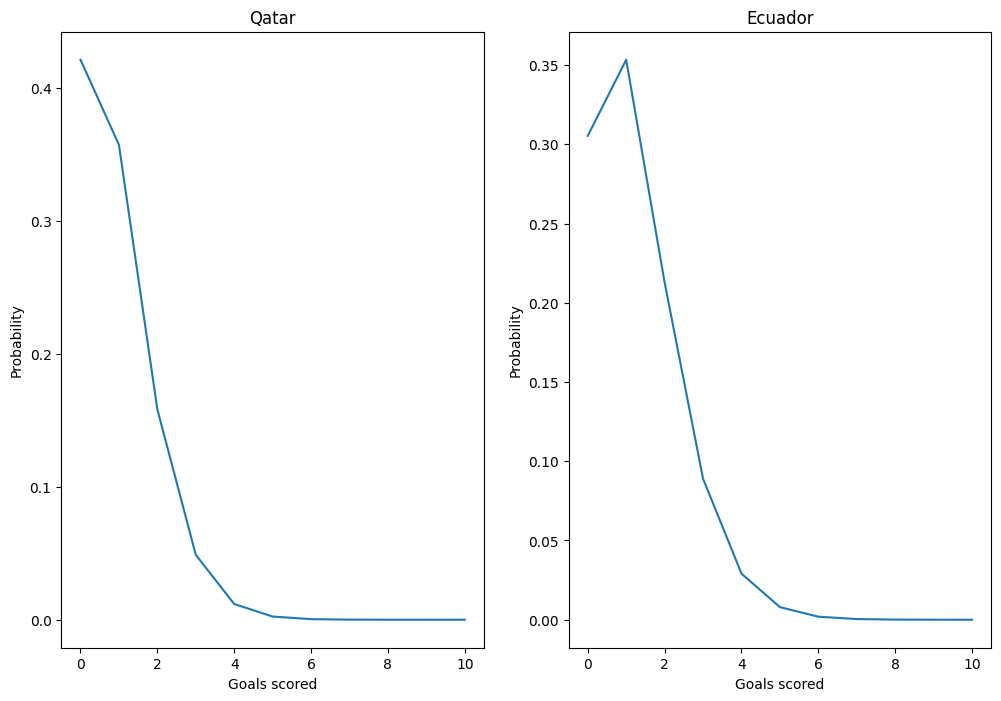

In [13]:
plt.subplots(1, 2, figsize=(12,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
teams = list(goal_probs[0][0].keys())
plt.subplot(1, 2, 1)
plt.plot(goal_probs[0][0][teams[0]].keys(), goal_probs[0][0][teams[0]].values())
plt.xlabel("Goals scored")
plt.ylabel("Probability")
plt.title(teams[0])
plt.subplot(1, 2, 2)
plt.plot(goal_probs[0][0][teams[1]].keys(), goal_probs[0][0][teams[1]].values())
plt.xlabel("Goals scored")
plt.ylabel("Probability")
plt.title(teams[1])
plt.show()

In [14]:
goal_probs[1][0] # first element of the scoreline predictions

(0, 1)

# Not passing in teams, but passing in rankings

In [14]:
# teams are not passed in, fifa_rankings are passed in
test2 = WCPred(results = results_since_2018_wc,
               fixtures = fixtures[fixtures.stage=='Group'],
               ratings = fifa_rankings)

By looking at `teams` attribute of `test2`, we can see that when no teams are passed, we just take it to be all the different teams that are in `results`.

In [15]:
len(test2.teams)

254

Trying to set the data, or fit the model will now give us an error as we have teams with no fifa data.

In [16]:
test2.get_goal_probabilities_for_fixtures()

AttributeError: 'WCPred' object has no attribute 'get_goal_probabilities_for_fixtures'

We get this error when trying to set the training data which checks whether or not we have fifa ratings for each team

In [17]:
test2.set_training_data()

[MODEL FITTING] Setting training data for the model


ValueError: Must have FIFA ratings and results for all teams. 46 teams with FIFA ratings but 254 teams with results.

# Not passing teams or fifa ratings

In [18]:
# teams and fifa rankings are not passed in
test3 = WCPred(results = results_since_2018_wc,
               fixtures = fixtures[fixtures.stage=='Group'])

Again, `test3.teams` will include every team found in `results`. We can still fit this model, but note that we are performing inference on a much larger dimension as we have to fit the model to teams which we don't go on to predict games for. The fitting of the model takes slightly longer but still within a minute.

We call `.get_goal_probabilities_for_fixtures()` first here instead.

In [19]:
goal_probs = test3.get_fixture_goal_probabilities()

[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████████████████████████████████████████████| 1500/1500 [00:14<00:00, 105.12it/s, 31 steps of size 1.22e-01. acc. prob=0.89]


In [20]:
type(goal_probs)

tuple

The goal probabilities are given in the first item of this tuple:

In [21]:
goal_probs[0][0]

{'Qatar': {0: DeviceArray(0.43887663, dtype=float32),
  1: DeviceArray(0.35782927, dtype=float32),
  2: DeviceArray(0.1494069, dtype=float32),
  3: DeviceArray(0.04259252, dtype=float32),
  4: DeviceArray(0.00932591, dtype=float32),
  5: DeviceArray(0.00167291, dtype=float32),
  6: DeviceArray(0.00025612, dtype=float32),
  7: DeviceArray(3.4430082e-05, dtype=float32),
  8: DeviceArray(4.1501016e-06, dtype=float32),
  9: DeviceArray(4.5587498e-07, dtype=float32),
  10: DeviceArray(4.6231133e-08, dtype=float32)},
 'Ecuador': {0: DeviceArray(0.43887663, dtype=float32),
  1: DeviceArray(0.35782927, dtype=float32),
  2: DeviceArray(0.1494069, dtype=float32),
  3: DeviceArray(0.04259252, dtype=float32),
  4: DeviceArray(0.00932591, dtype=float32),
  5: DeviceArray(0.00167291, dtype=float32),
  6: DeviceArray(0.00025612, dtype=float32),
  7: DeviceArray(3.4430082e-05, dtype=float32),
  8: DeviceArray(4.1501016e-06, dtype=float32),
  9: DeviceArray(4.5587498e-07, dtype=float32),
  10: DeviceAr

With corresponding scoreline simulation:

In [22]:
goal_probs[1][0]

(1, 0)

In [23]:
test3.get_fixture_probabilities()

,home_team,away_team,Team_1_win_probability,draw_probability,Team_2_win_probability,simulated_outcome
0,Qatar,Ecuador,0.309272,0.276337,0.414390,Draw
1,England,Iran,0.555745,0.264483,0.179772,Draw
2,Senegal,Netherlands,0.242255,0.284881,0.472863,Senegal
3,USA,Wales,0.548454,0.267677,0.183869,Draw
4,Argentina,Saudi Arabia,0.738244,0.187619,0.074136,Argentina
5,Mexico,Poland,0.452860,0.271292,0.275847,Mexico
6,Denmark,Tunisia,0.621998,0.237342,0.140659,Tunisia
7,France,Australia,0.594949,0.243398,0.161653,France
8,Morocco,Croatia,0.413092,0.278121,0.308787,Draw
9,Germany,Japan,0.543306,0.235984,0.220710,Germany


If we had knockout games, then we set `knockout=True` and we cannot get draws:

In [24]:
test3.get_fixture_probabilities(knockout=True)

,home_team,away_team,Team_1_win_probability,draw_probability,Team_2_win_probability,simulated_outcome
0,Qatar,Ecuador,0.309272,0.276337,0.414390,Qatar
1,England,Iran,0.555745,0.264483,0.179772,England
2,Senegal,Netherlands,0.242255,0.284881,0.472863,Senegal
3,USA,Wales,0.548454,0.267677,0.183869,Wales
4,Argentina,Saudi Arabia,0.738244,0.187619,0.074136,Argentina
5,Mexico,Poland,0.452860,0.271292,0.275847,Poland
6,Denmark,Tunisia,0.621998,0.237342,0.140659,Tunisia
7,France,Australia,0.594949,0.243398,0.161653,France
8,Morocco,Croatia,0.413092,0.278121,0.308787,Morocco
9,Germany,Japan,0.543306,0.235984,0.220710,Japan
